Importing all the necessary Libraries.

In [ ]:
from os import listdir
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Now Unzipping the Dataset

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/Car-Bike-Dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Rescaling the images and Preparing Training Set.

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Adjust target_size based on your image size preference
train_generator = train_datagen.flow_from_directory(
    '/content/Car-Bike-Dataset/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 3000 images belonging to 2 classes.


Build Our CNN Model

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


94/94 [==============================] - 11s 97ms/step - loss: 0.5366 - accuracy: 0.7310
Epoch 2/10
94/94 [==============================] - 10s 108ms/step - loss: 0.3119 - accuracy: 0.8707
Epoch 3/10
94/94 [==============================] - 10s 107ms/step - loss: 0.2611 - accuracy: 0.8890
Epoch 4/10
94/94 [==============================] - 9s 94ms/step - loss: 0.2144 - accuracy: 0.9130
Epoch 5/10
94/94 [==============================] - 10s 108ms/step - loss: 0.2156 - accuracy: 0.9130
Epoch 6/10
94/94 [==============================] - 10s 107ms/step - loss: 0.1959 - accuracy: 0.9290
Epoch 7/10
94/94 [==============================] - 9s 99ms/step - loss: 0.1716 - accuracy: 0.9397
Epoch 8/10
94/94 [==============================] - 9s 93ms/step - loss: 0.1560 - accuracy: 0.9400
Epoch 9/10
94/94 [==============================] - 10s 107ms/step - loss: 0.1439 - accuracy: 0.9490
Epoch 10/10
94/94 [==============================] - 10s 108ms/step - loss: 0.1231 - accuracy: 0.9570


95.7% accuracy in 10 epochs, a great score for sure.

Let's Plot a Relation between Accuracy score and Epoch.

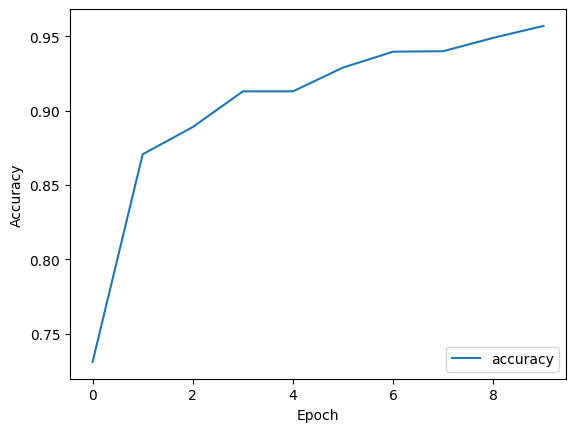

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

Write a Function to display a image for testing our model.

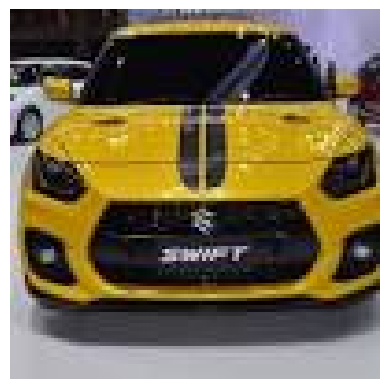

In [ ]:
def display_image(image_path):
    # Load the image
    img = mpimg.imread('/content/Car (921).jpeg')

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

# Example: Replace 'path_to_your_image.jpg' with the actual path to your image file
image_path = '/content/Car (921).jpeg'
display_image(image_path)

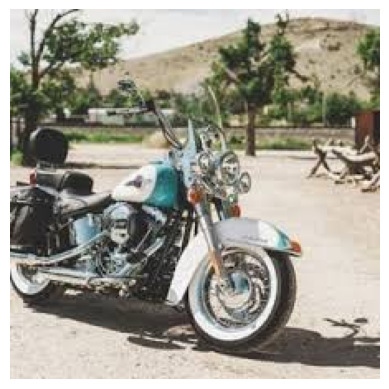

In [ ]:
image_path = '/content/Bike (982).jpeg'
display_image(image_path)

In [ ]:
test_image_path = 'Bike (982).jpeg'

img = tf.keras.preprocessing.image.load_img(test_image_path, target_size=(64, 64))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
img_array /= 255.0

# Make predictions
predictions = model.predict(img_array)
if predictions[0][0] >= 0.5:
    print("It's a car!")
else:
    print("It's a bike!")

1/1 [==============================] - 0s 17ms/step
It's a bike!


In [ ]:
test_image_path = 'Car (921).jpeg'

img = tf.keras.preprocessing.image.load_img(test_image_path, target_size=(64, 64))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
img_array /= 255.0

predictions = model.predict(img_array)
if predictions[0][0] >= 0.5:
    print("It's a car!")
else:
    print("It's a bike!")

1/1 [==============================] - 0s 19ms/step
It's a car!


Hurray!
Our Model is predicting Very Accurately.
We are Done here.